yt : [INFO     ] 2024-08-27 17:43:15,148 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2024-08-27 17:43:15,149 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-27 17:43:15,182 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2024-08-27 17:43:15,183 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-27 17:43:15,183 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-27 17:43:15,184 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-27 17:43:15,184 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-27 17:43:15,184 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2024-08-27 17:43:15,184 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-27 17:43:15,184 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-27 17:43:15,184 Parameters: omega_radiation  

Text(0, 0.5, 'kpc')

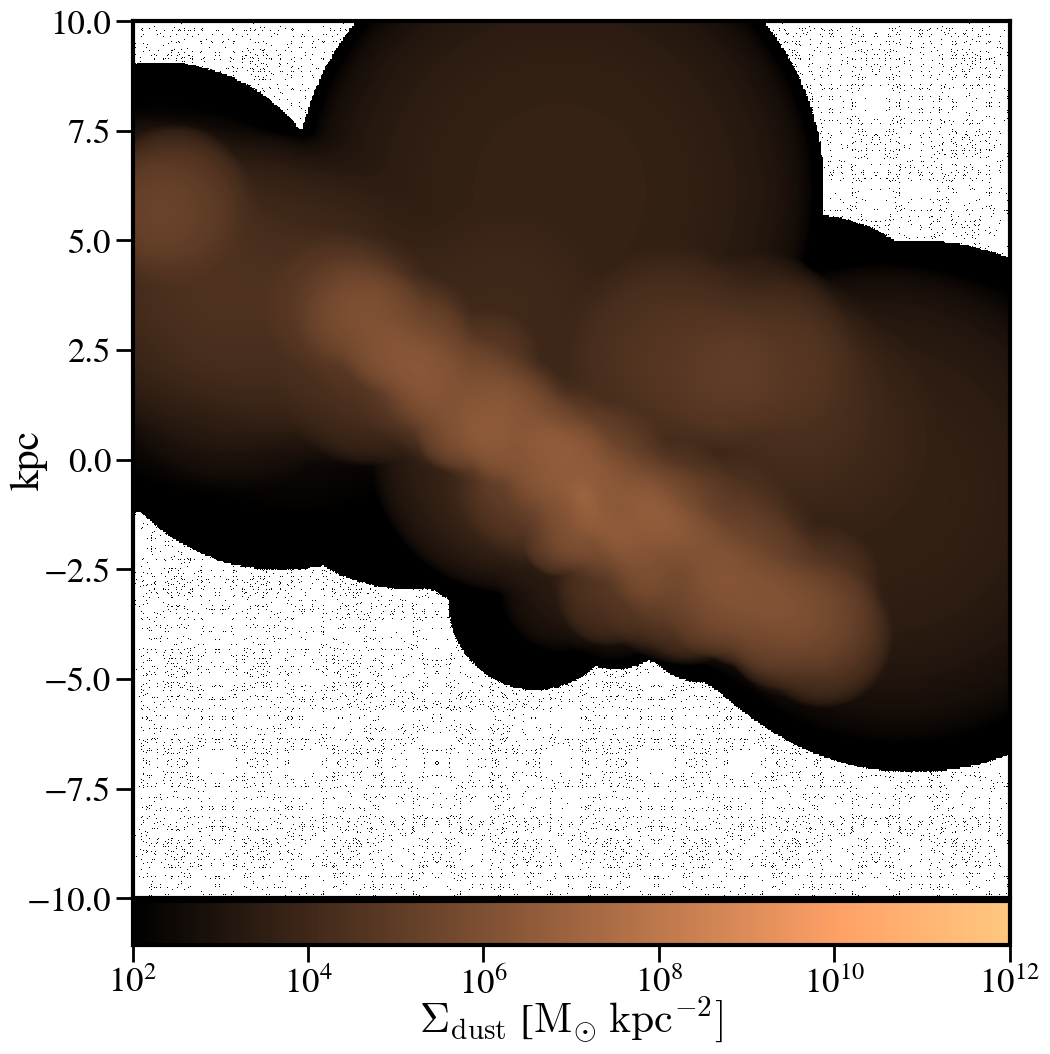

In [2]:
# The code comes from https://github.com/smlower/sl_simulation_tools/blob/main/caesar_sfh.py

import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

#load your data

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()

gal = obj.galaxies[6]

#i want to plot the dust mass surface densities for the most massive halo in the current snapshot, so:
dust_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
#note we have to do some clunky unit declaration first because the simba dust masses are indeed in code_mass but yt doesn't know that
dust_mass = ds.arr(ad['PartType0', 'Dust_Masses'][gal.glist], 'code_mass').in_units('Msun').value
hcoord = gal.minpotpos.in_units('kpc').value

extent=10 #this is like the 'width' parameter in yt projection plots
#this attempts to set the viewing angle with respect to the rotation axis of the galaxy disk
#but can be messed up for galaxies that are not quite disky yet
L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0,1,0]
cos_theta = np.dot(L, x_vec) / (np.sqrt(np.dot(x_vec, x_vec)) * np.sqrt(np.dot(L, L)))
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
t = np.rad2deg(np.arccos(cos_theta)) #the meaning of these params is defined later
p = np.rad2deg(np.arccos(cos_phi))

#first, we tell sphviewer where our particles are
P = sph.Particles(dust_pos*0.68, dust_mass*0.68) #factors of little h float everywhere :(

#second, sphviewer sets up a camera object, using the above viewing angle params
#t = theta, p = phi, and are defined in spherical coordinates (i think) w.r.t the simulation box
#r is the radial distance from the center at (x,y,z) = hcoord.
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,r='infinity',t=t, p=p, roll=0, extent=[-extent,extent,-extent,extent],xsize=400, ysize=400)
#and these two actually generate the image array
S = sph.Scene(P, Camera=C)
R = sph.Render(S)
img_dust = R.get_image()

#and plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))
vmin, vmax = 1e2, 1e12 #some educated guess as to 'good' array limits to get nice contrast in the plot
cNorm  = colors.LogNorm(vmin=vmin,vmax=vmax)
time = obj.simulation.time.in_units('Myr')
sm1 = ax1.imshow(img_dust, extent=[-extent,extent,-extent,extent],cmap=cm.copper, norm=cNorm)
ax1.set_xticklabels([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.03)
cbar = fig.colorbar(sm1, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Sigma_{\rm dust}$ '+'[$\mathrm{M_{\odot} \; kpc^{-2}}]$',labelpad=-5)
ax1.set_ylabel('kpc',labelpad=-15)
#ax1.annotate(f't = {time:.2f}',(-4,4),color='white',fontsize=20)

yt : [INFO     ] 2024-08-27 18:22:29,683 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2024-08-27 18:22:29,684 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-27 18:22:29,719 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2024-08-27 18:22:29,719 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-27 18:22:29,720 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-27 18:22:29,720 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-27 18:22:29,721 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-27 18:22:29,721 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2024-08-27 18:22:29,721 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-27 18:22:29,721 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-27 18:22:29,721 Parameters: omega_radiation  

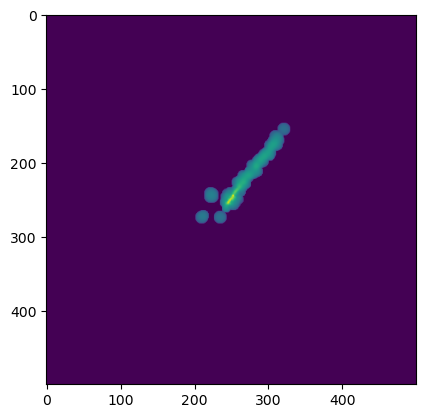

In [1]:
import h5py
from sphviewer.tools import QuickView
import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/region_snap129_r100_gal000000.h5'

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()
gal = obj.galaxies[0]

ex = 50
pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value*0.68
vel = ad['PartType0', 'Velocities'][gal.glist].in_units('m/s').value*0.68
hsml = ad['PartType0', 'SmoothingLength'][gal.glist].in_units('kpc').value*0.68
hcoord = gal.minpotpos.in_units('kpc').value
temp = ad['PartType0', 'Temperature'][gal.glist].in_units('K').value*0.68





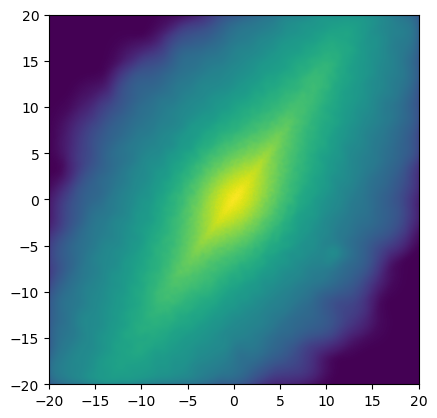

In [19]:
ex = 20
poss = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value*0.68
my = QuickView(poss, r='infinity', x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,plot=False,
               extent=[-ex,ex,-ex,ex], logscale=True)
myimg = my.get_image()
plt.imshow(myimg, extent=my.get_extent())

yt : [INFO     ] 2024-08-28 09:35:11,616 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-28 09:35:11,616 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-28 09:35:11,641 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-28 09:35:11,641 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-28 09:35:11,642 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-28 09:35:11,642 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-28 09:35:11,643 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-28 09:35:11,643 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-28 09:35:11,643 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-28 09:35:11,643 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-28 09:35:11,643 Parameters: omega_radiation     

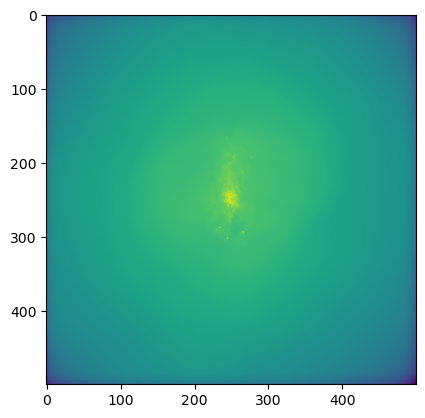

In [2]:
import h5py
from sphviewer.tools import QuickView
import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(129)
catfile  = sb.get_caesar_file(129)
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/region_snap129_r100_gal000000.h5'

ds = yt.load(subset)
obj = caesar.load(catfile)
ad = ds.all_data()
gal = obj.galaxies[0]

ex = 70
pos = ad['PartType0', 'Coordinates'].in_units('kpc').value*0.68
vel = ad['PartType0', 'Velocities'].in_units('m/s').value*0.68
hsml = ad['PartType0', 'SmoothingLength'].in_units('kpc').value*0.68
hcoord = gal.minpotpos.in_units('kpc').value
temp = ad['PartType0', 'Temperature'].in_units('K').value*0.68
gas = ds.arr(ad['PartType0', 'Masses'], 'code_mass').in_units('Msun').value*0.68
dust = ds.arr(ad['PartType0', 'Dust_Masses'], 'code_mass').in_units('Msun').value*0.68


#Calculate the density field
my = QuickView(pos, temp, hsml=hsml, r='infinity', x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,plot=False,
               extent=[-ex,ex,-ex,ex], logscale=True)
myimg = my.get_image()
plt.imshow(myimg)


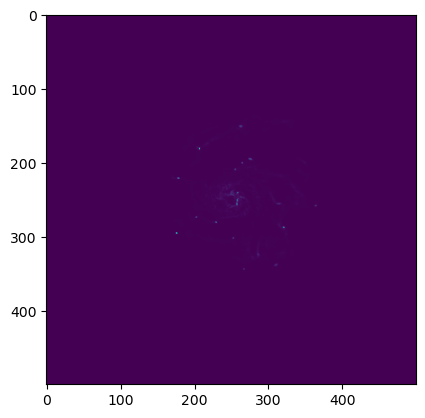

In [21]:
import numpy as np

def find_rot_ax(L, t=None, p=None, spos='faceon'):
    """Find the rotation angles for the given angular momentum vector."""
    x_vec = np.array([1, 0, 0])
    y_vec = np.array([0, 1, 0])
    cos_theta = np.dot(L, x_vec) / (np.linalg.norm(x_vec) * np.linalg.norm(L))
    cos_phi = np.dot(L, y_vec) / (np.linalg.norm(y_vec) * np.linalg.norm(L))
    
    if t is None and spos == 'faceon':
        t = np.rad2deg(np.arccos(cos_theta))
    if p is None and spos == 'faceon':
        p = np.rad2deg(np.arccos(cos_phi)) + 90

    if t is None and spos == 'edgeon':
        t = np.rad2deg(np.arccos(cos_theta))
    if p is None and spos == 'edgeon':
        p = np.rad2deg(np.arccos(cos_phi))
    
    return t, p

def rotation_matrices_from_angles(theta, phi):
    """Generate rotation matrices for angles theta (rotation around Z) and phi (rotation around Y)."""
    theta = np.radians(theta)
    phi = np.radians(phi)
    
    R_z = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0, 0, 1]
    ])
    
    R_y = np.array([
        [np.cos(phi), 0, np.sin(phi)],
        [0, 1, 0],
        [-np.sin(phi), 0, np.cos(phi)]
    ])
    
    return R_z @ R_y  # Combined rotation matrix


# Example data
L = gal.rotation['gas_L']  # Angular momentum vector (example)
spos = 'faceon'  # Or 'edgeon'
t, p = find_rot_ax(L, spos=spos)

# Calculate rotation matrix
R = rotation_matrices_from_angles(t, p)

# Rotate positions and velocities
rpos = np.dot(pos-hcoord*0.68, R.T)
rvel = np.dot(vel, R.T)
rpos+=hcoord*0.68

#Calculate the density field
qv = QuickView(rpos, hsml=hsml, r='infinity', x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,
               plot=False, extent=[-ex,ex,-ex,ex], logscale=False)
density_field = qv.get_image()
plt.imshow(density_field)
extent = qv.get_extent()
# Now you can use rotated_pos and rotated_vel for further analysis or visualization


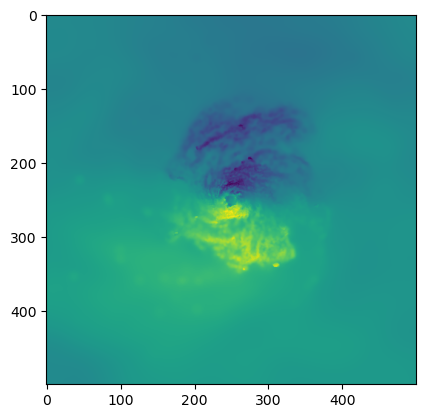

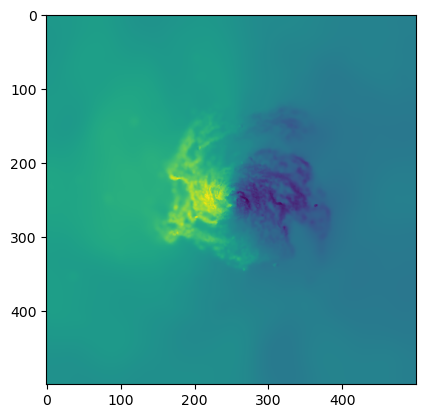

In [22]:
vfield = []
for i in range(2):
     qv = QuickView(rpos, rvel[:,i], hsml=hsml, r='infinity', x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,plot=False,
     extent=[-ex,ex,-ex,ex], logscale=False)
     vfield.append(qv.get_image()/density_field)

plt.imshow(vfield[0])
plt.figure()
plt.imshow(vfield[1])

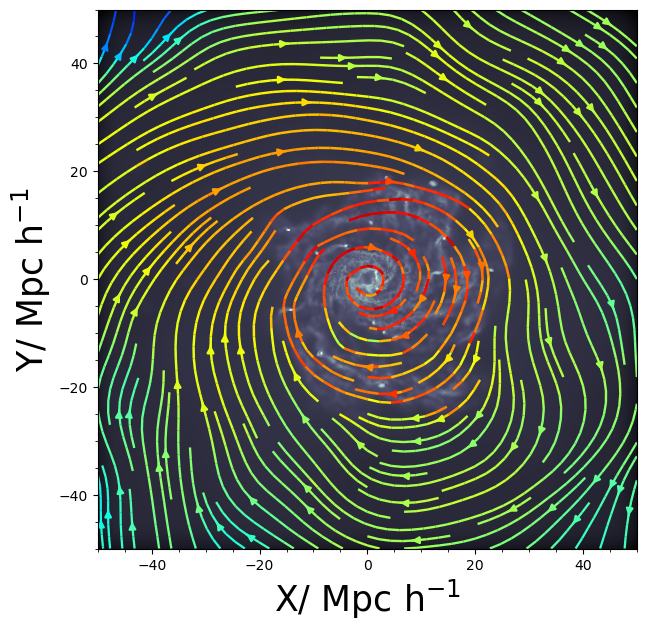

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(7,7))
ax = fig.add_subplot(111)
X = np.linspace(extent[0], extent[1], 500)
Y = np.linspace(extent[2], extent[3], 500)
ax.imshow(np.log1p(density_field), origin='lower', extent=extent, cmap='bone')
v = np.log1p(np.sqrt(vfield[0]**2+vfield[1]**2))
color = v/np.max(v)
lw = 2*color
streams = ax.streamplot(X,Y, vfield[0], vfield[1], color=color,
                        density=1.5, cmap='jet', linewidth=lw, arrowsize=1)
ax.set_xlim(extent[0],extent[1])
ax.set_ylim(extent[2],extent[3])
ax.minorticks_on()
ax.set_xlabel(r'$\rm X / \ Mpc \ h^{-1}$', size=25)
ax.set_ylabel(r'$\rm Y / \ Mpc \ h^{-1}$', size=25)
plt.show()

In [ ]:
a = np.arange(3)
print(a[:2]

yt : [INFO     ] 2024-08-28 17:43:56,494 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-28 17:43:56,495 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-28 17:43:56,516 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-28 17:43:56,516 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-28 17:43:56,517 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-28 17:43:56,517 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-28 17:43:56,518 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-28 17:43:56,518 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-28 17:43:56,518 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-28 17:43:56,518 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-28 17:43:56,518 Parameters: omega_radiation     

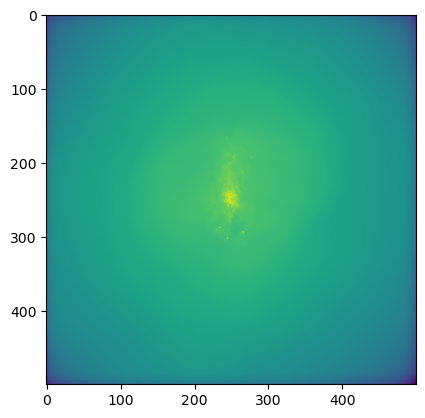

In [19]:
import h5py
from sphviewer.tools import QuickView
import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(129)
catfile  = sb.get_caesar_file(129)
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/region_snap129_r100_gal000000.h5'

ds = yt.load(subset)
obj = caesar.load(catfile)
ad = ds.all_data()
gal = obj.galaxies[0]

ex = 70
pos = ad['PartType0', 'Coordinates'].in_units('kpc').value*0.68
vel = ad['PartType0', 'Velocities'].in_units('m/s').value*0.68
hsml = ad['PartType0', 'SmoothingLength'].in_units('kpc').value*0.68
hcoord = gal.minpotpos.in_units('kpc').value
temp = ad['PartType0', 'Temperature'].in_units('K').value*0.68
gas = ds.arr(ad['PartType0', 'Masses'], 'code_mass').in_units('Msun').value*0.68
dust = ds.arr(ad['PartType0', 'Dust_Masses'], 'code_mass').in_units('Msun').value*0.68
poss = ad['PartType4', 'Coordinates'].in_units('kpc').value*0.68
stars = ad['PartType4', 'Masses'].in_units('Msun').value*0.68

#Calculate the density field
my = QuickView(pos, temp, hsml=hsml, r='infinity', x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,plot=False,
               extent=[-ex,ex,-ex,ex], logscale=True)
myimg = my.get_image()
plt.imshow(myimg)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6.685966 10.509835
5.605529 10.522435
(400, 400, 4)


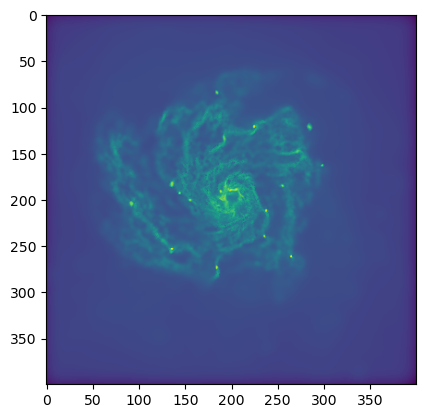

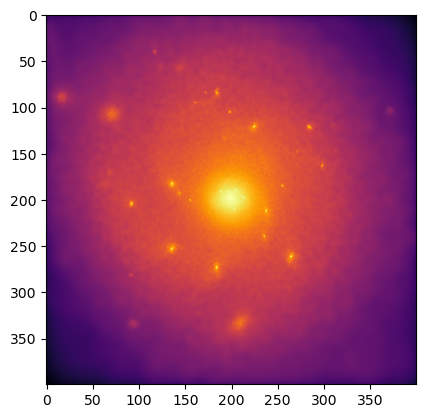

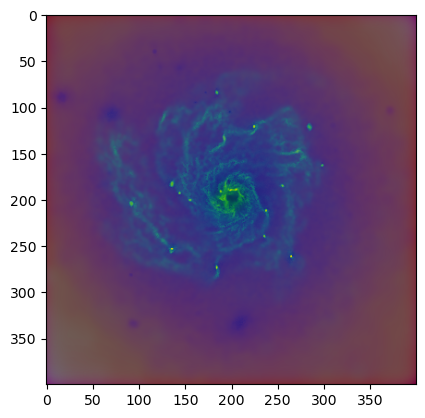

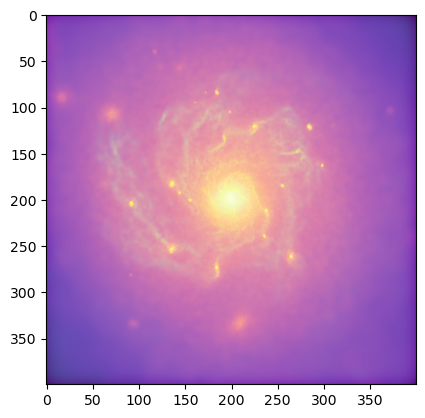

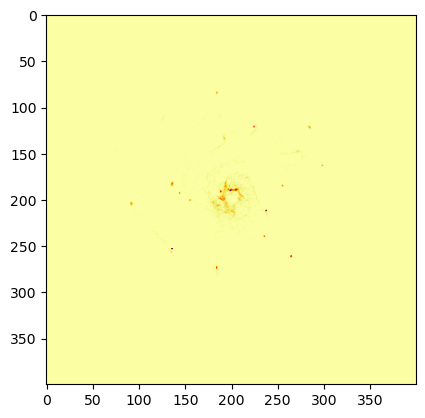

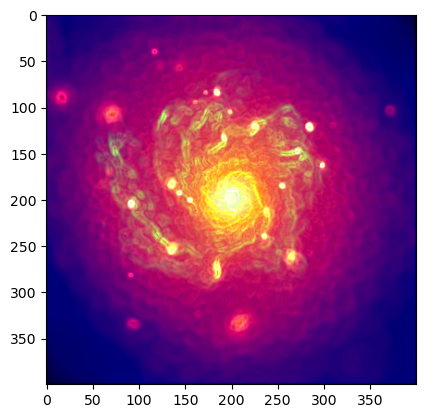

In [65]:
# normalize image
def normim(im):
    mk = im > 0
    im[mk] = np.log10(im[mk])
    print(im.min(), im.max())
    im = (im - im.min())/(im.max()-im.min())
    return im


extent = 40
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,r='infinity',t=0, p=90, roll=0, extent=[-extent,extent,-extent,extent],xsize=400, ysize=400)
Pg = sph.Particles(pos, gas)
Pd = sph.Particles(poss, stars)
Sg = sph.Scene(Pg, Camera=C)
Sd = sph.Scene(Pd, Camera=C)
Rg = sph.Render(Sg)
Rd = sph.Render(Sd)
imgg = Rg.get_image()
imgd = Rd.get_image()


Pm = sph.Particles(pos, dust)
Sm = sph.Scene(Pm, Camera=C)
Rm = sph.Render(Sm)
scr = Rm.get_image()

norm_imgg = normim(imgg)
norm_imgd = normim(imgd)
plt.figure()
plt.imshow(norm_imgg, cmap='viridis')
plt.figure()
plt.imshow(norm_imgd, cmap='inferno')

from sphviewer.tools import Blend
import matplotlib.cm as cm
import cv2
plt.figure()
blendO = Blend.Blend(cm.viridis(norm_imgg), cm.inferno_r(norm_imgd))
plt.imshow(blendO.Overlay())

plt.figure()
blendS = Blend.Blend(cm.viridis(norm_imgg), cm.inferno(norm_imgd))
plt.imshow(blendS.Screen())
bS = blendS.Screen()

plt.figure()
f = apply_dust_screen(bS, scr)
plt.imshow(f, cmap='inferno')



print(bS.shape)
# mappa contrasto
#gray_image = cv2.cvtColor(bS[:, :, :3], cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(bS, cv2.CV_64F, 1, 0, ksize=5)  # Gradiente lungo l'asse X
sobely = cv2.Sobel(bS, cv2.CV_64F, 0, 1, ksize=5)  # Gradiente lungo l'asse Y
gradient_magnitude = cv2.magnitude(sobelx, sobely)
contrast_map = cv2.normalize(gradient_magnitude, None, 0, 1, cv2.NORM_MINMAX)
# Supponendo che contrast_map e image siano normalizzati tra 0 e 1
overlay_result = 2 * bS * contrast_map + (1 - 2 * (1 - bS) * (1 - contrast_map))
plt.figure()
plt.imshow(overlay_result, cmap='magma')

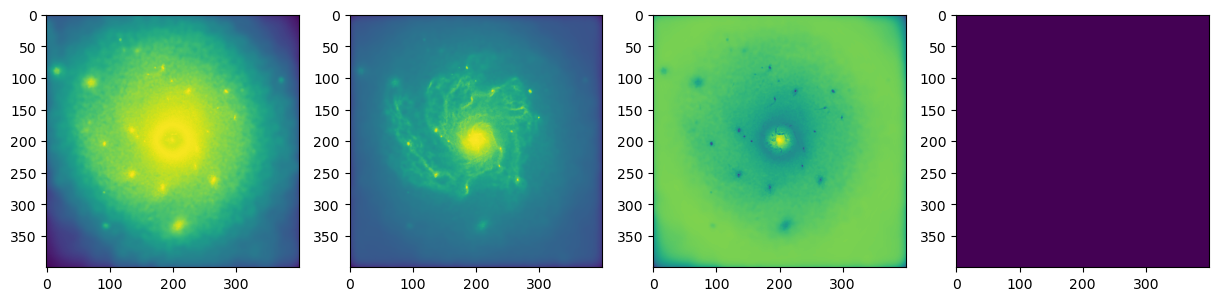

In [63]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(bS[:,:,0])
ax[1].imshow(bS[:,:,1])
ax[2].imshow(bS[:,:,2])
ax[3].imshow(bS[:,:,3])

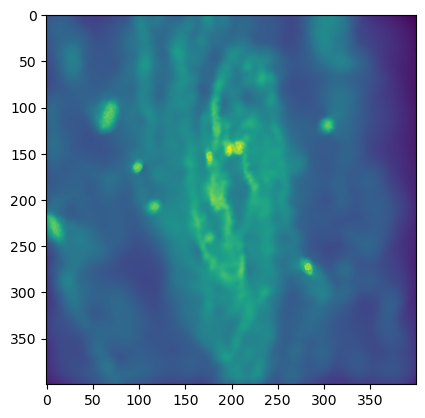

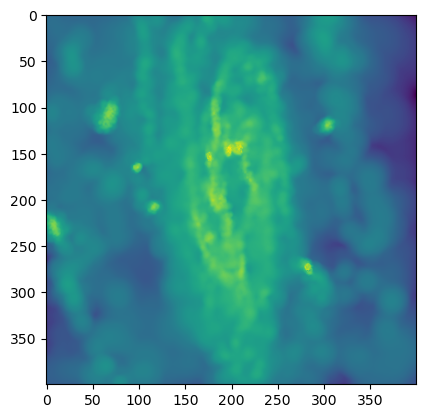

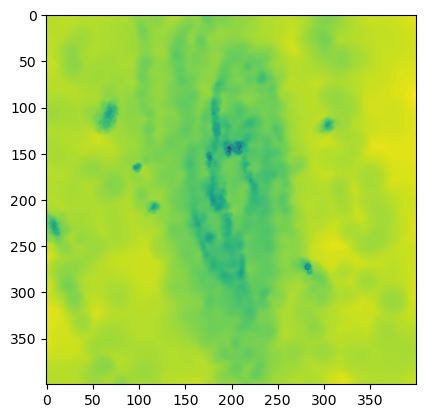

In [64]:
def apply_dust_screen(image, dust):
    # Ensure the dust image is in the correct range and type
    if len(image.shape)>2:
        image = image[:, :, -1]
        dust_gray = dust
        dust = (dust_gray - dust_gray.min()) / (dust_gray.max() - dust_gray.min())
        return image-dust
        
    dust_gray = dust
    
    # Normalize the grayscale dust image
    normalized_dust = (dust_gray - dust_gray.min()) / (dust_gray.max() - dust_gray.min())
    inverted_dust = 1 - normalized_dust
    
    # Apply the dust screen to the image
    screened = image * inverted_dust
    
    return screened

extent = 7
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,r='infinity',t=0, p=0, roll=0, extent=[-extent,extent,-extent,extent],xsize=400, ysize=400)
Pg = sph.Particles(pos, gas)
Pd = sph.Particles(pos, dust)
Sg = sph.Scene(Pg, Camera=C)
Sd = sph.Scene(Pd, Camera=C)
Rg = sph.Render(Sg)
Rd = sph.Render(Sd)
imgg = np.log1p(Rg.get_image())
imgd = np.log1p(Rd.get_image())


plt.imshow(imgg)
plt.figure()
plt.imshow(imgd)
plt.figure()
screened = apply_dust_screen(imgg, imgd)
plt.imshow(np.log1p(screened))

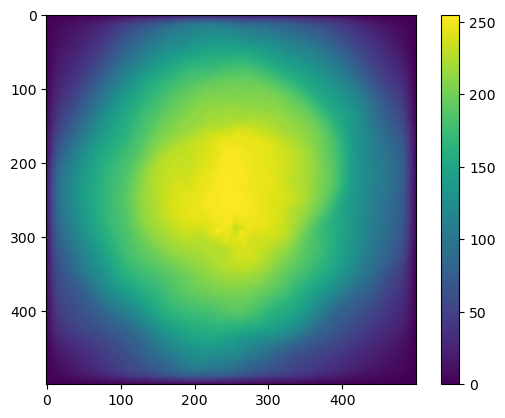

In [36]:
# Normalizza l'immagine
# Normalizza l'immagine per assicurarsi che i valori siano in un range adatto
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Applica l'equalizzazione dell'istogramma
equalized_img = cv2.equalizeHist(img)

# Mostra l'immagine equalizzata
plt.imshow(equalized_img, cmap='viridis')
plt.colorbar()
plt.show()
plt.show()

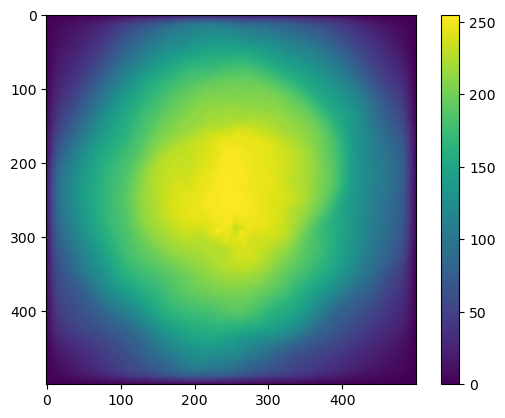

In [38]:
# Trasformazione logaritmica
# Normalizza l'immagine
normimg = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Applica CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(img)

# Mostra l'immagine CLAHE
plt.imshow(clahe_img, cmap='viridis')
plt.colorbar()
plt.show()

yt : [INFO     ] 2024-08-24 20:24:20,143 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2024-08-24 20:24:20,144 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-24 20:24:20,163 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2024-08-24 20:24:20,163 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2024-08-24 20:24:20,164 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-24 20:24:20,165 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-24 20:24:20,165 Parameters: omega_radiation  

Text(0, 0.5, 'kpc')

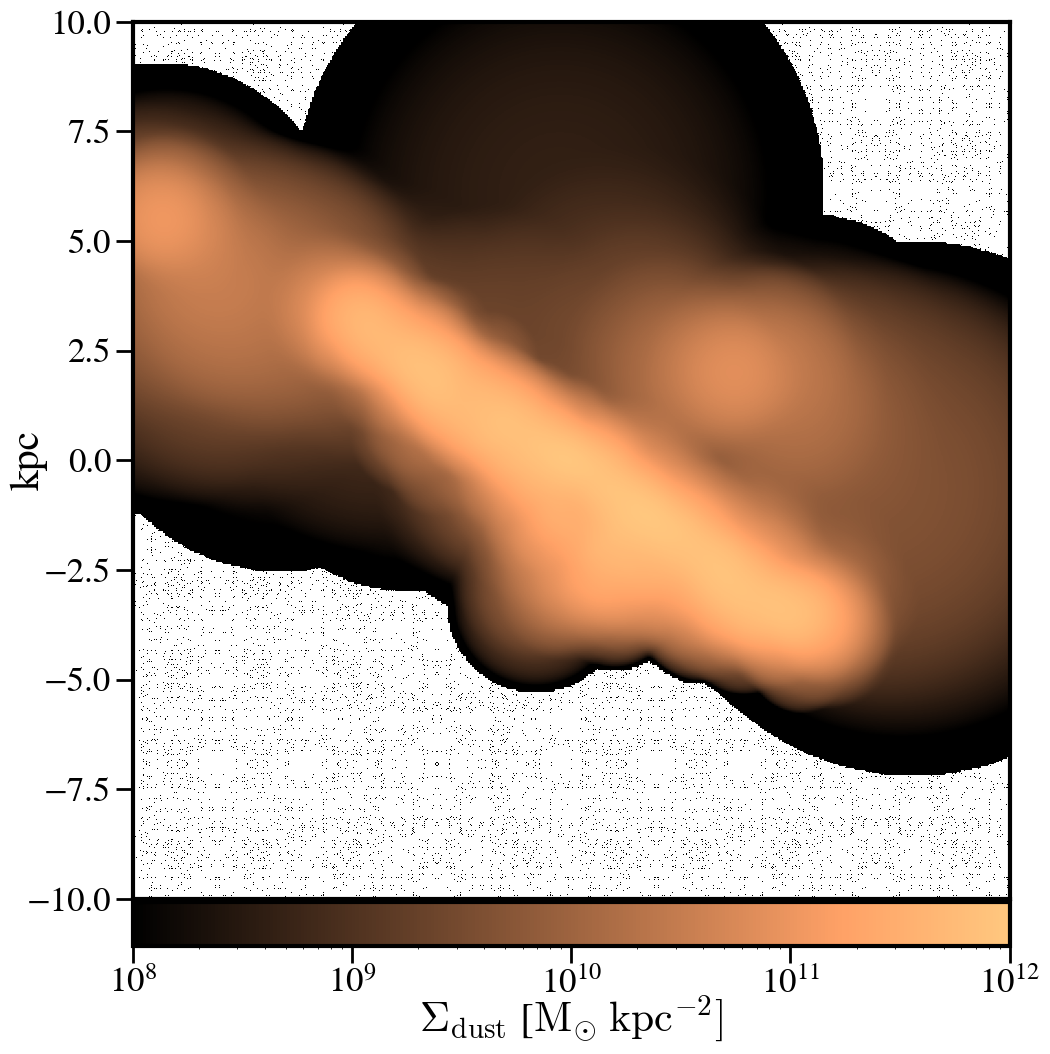

In [44]:
# The code comes from https://github.com/smlower/sl_simulation_tools/blob/main/caesar_sfh.py

import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

#load your data

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()

gal = obj.galaxies[6]

#i want to plot the dust mass surface densities for the most massive halo in the current snapshot, so:
dust_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
#note we have to do some clunky unit declaration first because the simba dust masses are indeed in code_mass but yt doesn't know that
dust_mass = ds.arr(ad['PartType0', 'GrackleHI'][gal.glist], 'code_mass').in_units('Msun').value
hcoord = gal.minpotpos.in_units('kpc').value

extent=10 #this is like the 'width' parameter in yt projection plots
#this attempts to set the viewing angle with respect to the rotation axis of the galaxy disk
#but can be messed up for galaxies that are not quite disky yet
L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0,1,0]
cos_theta = np.dot(L, x_vec) / (np.sqrt(np.dot(x_vec, x_vec)) * np.sqrt(np.dot(L, L)))
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
t = np.rad2deg(np.arccos(cos_theta)) #the meaning of these params is defined later
p = np.rad2deg(np.arccos(cos_phi))

#first, we tell sphviewer where our particles are
P = sph.Particles(dust_pos*0.68, dust_mass*0.68) #factors of little h float everywhere :(
#second, sphviewer sets up a camera object, using the above viewing angle params
#t = theta, p = phi, and are defined in spherical coordinates (i think) w.r.t the simulation box
#r is the radial distance from the center at (x,y,z) = hcoord.
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,r='infinity',t=t, p=p, roll=0, extent=[-extent,extent,-extent,extent],xsize=400, ysize=400)
#and these two actually generate the image array
S = sph.Scene(P, Camera=C)
R = sph.Render(S)
img_dust = R.get_image()

#and plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))
vmin, vmax = 1e8, 1e12 #some educated guess as to 'good' array limits to get nice contrast in the plot
cNorm  = colors.LogNorm(vmin=vmin,vmax=vmax)
time = obj.simulation.time.in_units('Myr')
sm1 = ax1.imshow(img_dust, extent=[-extent,extent,-extent,extent],cmap=cm.copper, norm=cNorm)
ax1.set_xticklabels([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.03)
cbar = fig.colorbar(sm1, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Sigma_{\rm dust}$ '+'[$\mathrm{M_{\odot} \; kpc^{-2}}]$',labelpad=-5)
ax1.set_ylabel('kpc',labelpad=-15)
#ax1.annotate(f't = {time:.2f}',(-4,4),color='white',fontsize=20)

In [40]:
cs = sb.get_caesar(125)
print(sb.get_z_from_snap(125))
h1 = np.asarray([i.masses['dust'] for i in cs.galaxies])
m1 = np.asarray([i.masses['stellar'] for i in cs.galaxies])
w = np.where(h1>1e8)[0]
z = np.where(m1>1e11)[0]
print(w, z)

yt : [INFO     ] 2024-08-24 20:23:10,542 Opening /media/lorenzong/Data1/simba_hig_res/m25n512_125.hdf5
yt : [INFO     ] 2024-08-24 20:23:10,551 Found 261717 halos
yt : [INFO     ] 2024-08-24 20:23:10,558 Found 5246 galaxies


0.49043513253694404
[  0   1   3   6   8   9  11  12  13  16  21  25  28  33  34  37  42  45
  47  48  49  50  57  65  74 120] [ 0  1  2  3  4  5  6  7  8  9 10 11]


In [32]:
m1[500]


3925775616.0

In [33]:
dust_mass.max()

13897914220.30505

yt : [INFO     ] 2024-08-24 20:24:09,320 Calculating time from 9.675e-01 to be 4.226e+17 seconds
yt : [INFO     ] 2024-08-24 20:24:09,321 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-24 20:24:09,340 Parameters: current_time              = 4.2259765710587424e+17 s
yt : [INFO     ] 2024-08-24 20:24:09,340 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-24 20:24:09,341 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-24 20:24:09,341 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: current_redshift          = 0.033612031534076214
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-24 20:24:09,342 Parameters: omega_radiation  

Text(0, 0.5, 'kpc')

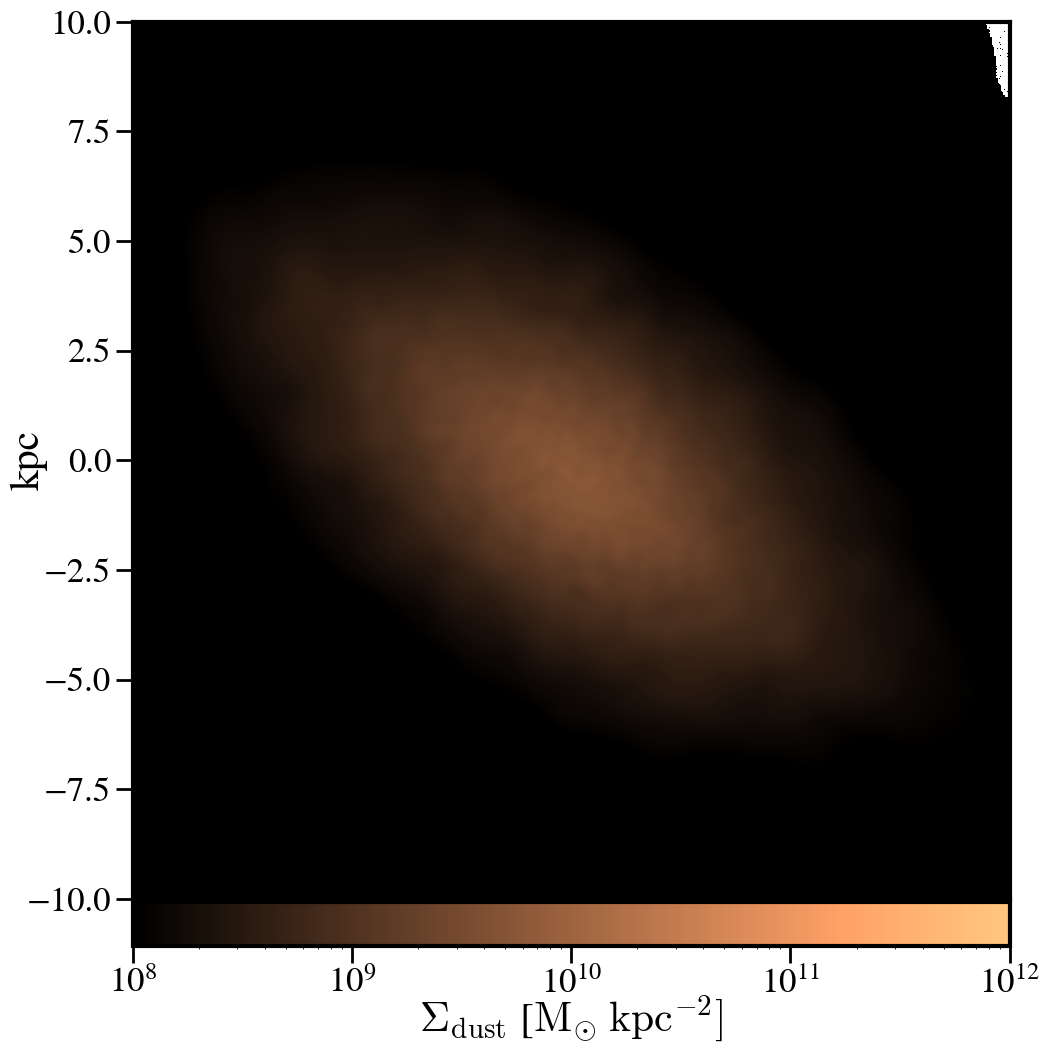

In [43]:
# The code comes from https://github.com/smlower/sl_simulation_tools/blob/main/caesar_sfh.py

import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


import modules as anal
import modules.anal_func as anal_func

matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

#load your data

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()

gal = obj.galaxies[6]

#i want to plot the dust mass surface densities for the most massive halo in the current snapshot, so:
dust_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value
#note we have to do some clunky unit declaration first because the simba dust masses are indeed in code_mass but yt doesn't know that
dust_mass = ad['PartType4', 'Masses'][gal.slist].in_units('Msun').value
hcoord = gal.minpotpos.in_units('kpc').value

extent=10 #this is like the 'width' parameter in yt projection plots
#this attempts to set the viewing angle with respect to the rotation axis of the galaxy disk
#but can be messed up for galaxies that are not quite disky yet
L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0,1,0]
cos_theta = np.dot(L, x_vec) / (np.sqrt(np.dot(x_vec, x_vec)) * np.sqrt(np.dot(L, L)))
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
t = np.rad2deg(np.arccos(cos_theta)) #the meaning of these params is defined later
p = np.rad2deg(np.arccos(cos_phi))

#first, we tell sphviewer where our particles are
P = sph.Particles(dust_pos*0.68, dust_mass*0.68) #factors of little h float everywhere :(
#second, sphviewer sets up a camera object, using the above viewing angle params
#t = theta, p = phi, and are defined in spherical coordinates (i think) w.r.t the simulation box
#r is the radial distance from the center at (x,y,z) = hcoord.
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68,r='infinity',t=t, p=p, roll=0, extent=[-extent,extent,-extent,extent],xsize=400, ysize=400)
#and these two actually generate the image array
S = sph.Scene(P, Camera=C)
R = sph.Render(S)
img_dust = R.get_image()

#and plot
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))
vmin, vmax = 1e8, 1e12 #some educated guess as to 'good' array limits to get nice contrast in the plot
cNorm  = colors.LogNorm(vmin=vmin,vmax=vmax)
time = obj.simulation.time.in_units('Myr')
sm1 = ax1.imshow(img_dust, extent=[-extent,extent,-extent,extent],cmap=cm.copper, norm=cNorm)
ax1.set_xticklabels([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.03)
cbar = fig.colorbar(sm1, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Sigma_{\rm dust}$ '+'[$\mathrm{M_{\odot} \; kpc^{-2}}]$',labelpad=-5)
ax1.set_ylabel('kpc',labelpad=-15)
#ax1.annotate(f't = {time:.2f}',(-4,4),color='white',fontsize=20)

yt : [INFO     ] 2024-08-24 21:35:58,267 Calculating time from 4.661e-01 to be 1.695e+17 seconds
yt : [INFO     ] 2024-08-24 21:35:58,267 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-24 21:35:58,286 Parameters: current_time              = 1.694799870056887e+17 s
yt : [INFO     ] 2024-08-24 21:35:58,287 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-24 21:35:58,287 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-24 21:35:58,288 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-24 21:35:58,288 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-24 21:35:58,288 Parameters: current_redshift          = 1.145471554829339
yt : [INFO     ] 2024-08-24 21:35:58,289 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-24 21:35:58,289 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-24 21:35:58,289 Parameters: omega_radiation      

Text(0, 0.5, 'kpc')

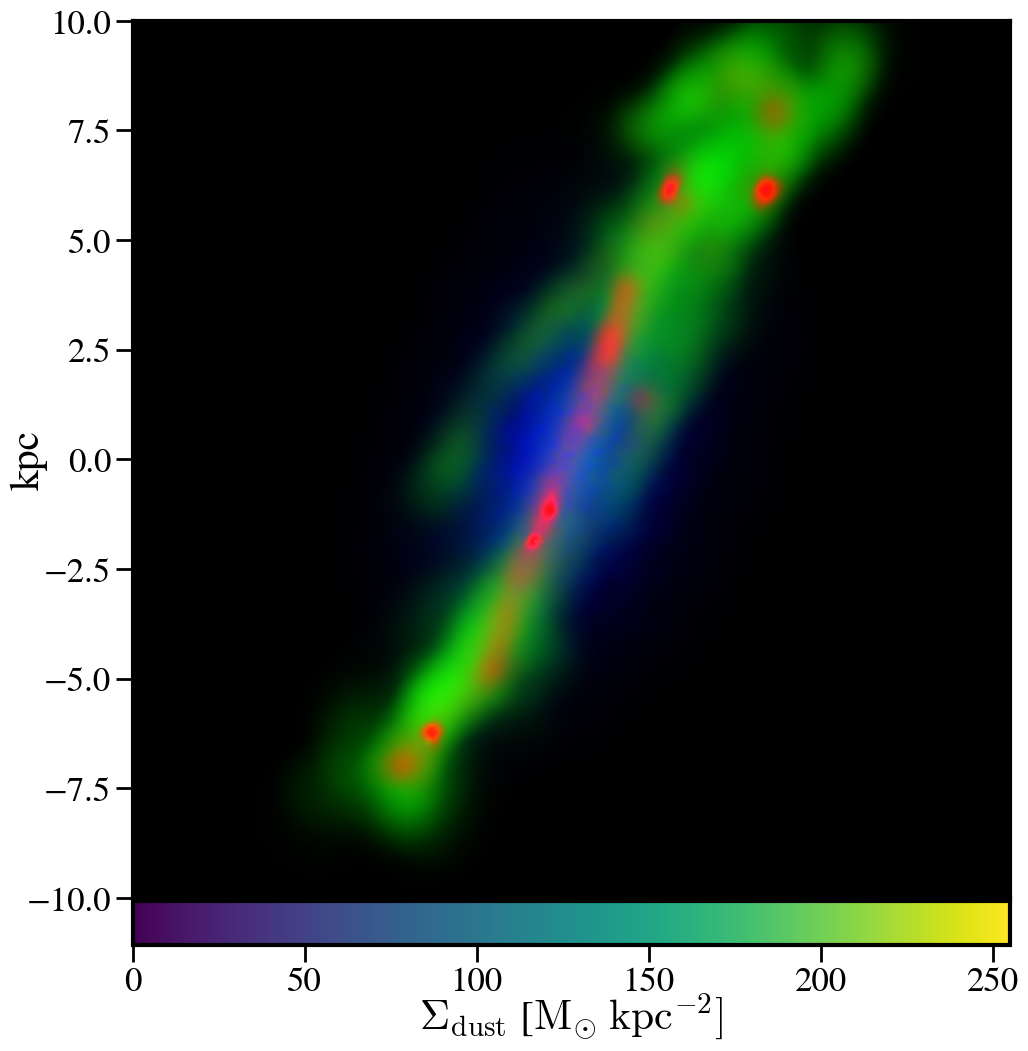

In [70]:
import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

import modules as anal
import modules.anal_func as anal_func

matplotlib.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (12,12),  # Adjust figure size if needed
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

# Load your data
sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(100)
catfile  = sb.get_caesar_file(100)

ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()

gal = obj.galaxies[1]

# Dust Data
dust_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
dust_mass = ds.arr(ad['PartType0', 'GrackleHII'][gal.glist], 'code_mass').in_units('Msun').value
hcoord = gal.minpotpos.in_units('kpc').value

# Gas Data
gas_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
gas_mass = ds.arr(ad['PartType0', 'GrackleHI'][gal.glist], 'code_mass').in_units('Msun').value

# star Data
star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value
star_mass = ad['PartType4', 'Masses'][gal.slist].in_units('Msun').value

extent = 10  # Width parameter for projection plots

# Set viewing angle based on galaxy rotation
L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0, 1, 0]
cos_theta = np.dot(L, x_vec) / (np.sqrt(np.dot(x_vec, x_vec)) * np.sqrt(np.dot(L, L)))
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
t = np.rad2deg(np.arccos(cos_theta))  # theta
p = np.rad2deg(np.arccos(cos_phi))    # phi

# Dust Particles
P_dust = sph.Particles(dust_pos*0.68, dust_mass*0.68)

# Gas Particles
P_gas = sph.Particles(gas_pos*0.68, gas_mass*0.68)

P_star = sph.Particles(star_pos*0.68, star_mass*0.68)

# Camera setup
C = sph.Camera(x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68, r='infinity', t=t, p=p, roll=0, extent=[-extent, extent, -extent, extent], xsize=400, ysize=400)

# Render Dust Image
S_dust = sph.Scene(P_dust, Camera=C)
R_dust = sph.Render(S_dust)
img_dust = R_dust.get_image()

# Render Gas Image
S_gas = sph.Scene(P_gas, Camera=C)
R_gas = sph.Render(S_gas)
img_gas = R_gas.get_image()

# Render Star Image
S_star = sph.Scene(P_star, Camera=C)
R_star = sph.Render(S_star)
img_star = R_star.get_image()

# Normalize images to [0, 1]
def normalize_image(img, vmin, vmax):
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    return norm(img)

# vmin_dust, vmax_dust = 1e7, 1e13  # Dust normalization limits
# vmin_gas, vmax_gas = 1e7, 1e13    # Gas normalization limits
# vmin_star, vmax_star = 1e4, 1e11 

vmin_dust, vmax_dust = np.percentile(img_dust, [1, 99])
vmin_gas, vmax_gas = np.percentile(img_gas, [1, 99])
vmin_star, vmax_star = np.percentile(img_star, [1, 99])

norm_dust = normalize_image(img_dust, vmin_dust, vmax_dust)
norm_gas = normalize_image(img_gas, vmin_gas, vmax_gas)
norm_star = normalize_image(img_star, vmin_star, vmax_star)

# # Create RGB image
# rgb_image = np.zeros((img_dust.shape[0], img_dust.shape[1], 3))
# rgb_image[..., 0] = img_dust  # Red channel for dust
# rgb_image[..., 1] = img_gas  
# rgb_image[..., 2] = img_star  

from astropy.visualization import make_lupton_rgb
rgb_image = make_lupton_rgb(norm_dust, norm_gas, norm_star, Q=10, stretch=0.5, filename="test_rgb.jpeg")

# # Plot the RGB image
fig, ax1 = plt.subplots(1, 1, figsize=(12,12))

sm1 = ax1.imshow(rgb_image, extent=[-extent, extent, -extent, extent])
ax1.set_xticklabels([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes("bottom", size="5%", pad=0.03)
cbar = fig.colorbar(sm1, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'$\Sigma_{\rm dust}$ '+'[$\mathrm{M_{\odot} \; kpc^{-2}}]$',labelpad=-5)
ax1.set_ylabel('kpc',labelpad=-15)

yt : [INFO     ] 2024-08-25 13:38:59,066 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-25 13:38:59,067 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-25 13:38:59,100 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-25 13:38:59,100 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-25 13:38:59,101 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-25 13:38:59,101 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-25 13:38:59,102 Parameters: omega_radiation     

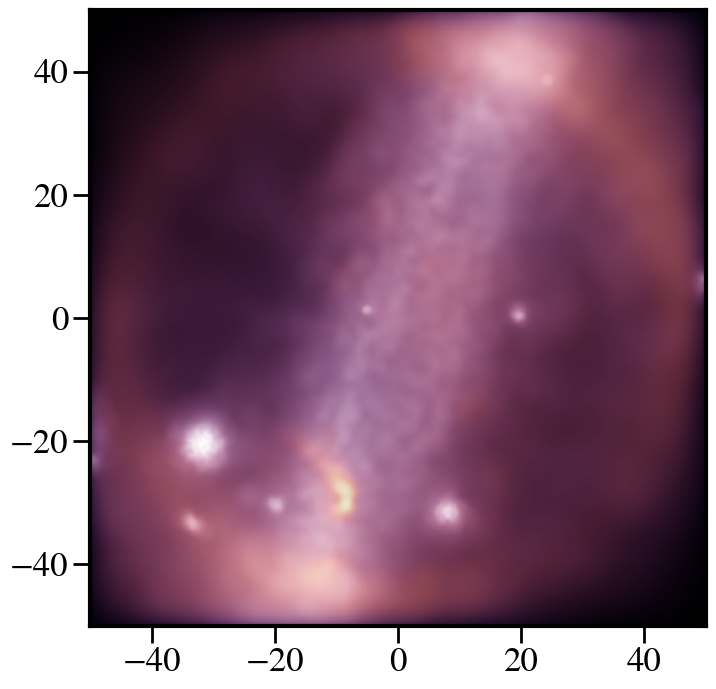

In [3]:
# The code comes from https://github.com/smlower/sl_simulation_tools/blob/main/caesar_sfh.py

import sphviewer as sph
import numpy as np
import yt, caesar
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sphviewer.tools import QuickView
from sphviewer.tools import Blend


import modules as anal
import modules.anal_func as anal_func

plt.rcParams.update({
 "savefig.facecolor": "w",
 "figure.facecolor" : 'w',
 "figure.figsize" : (10,8),
 "text.color": "k",
 "legend.fontsize" : 20,
 "font.size" : 30,
 "axes.edgecolor": "k",
 "axes.labelcolor": "k",
 "axes.linewidth": 3,
 "xtick.color": "k",
 "ytick.color": "k",
 "xtick.labelsize" : 25,
 "ytick.labelsize" : 25,
 "ytick.major.size" : 12,
 "xtick.major.size" : 12,
 "ytick.major.width" : 2,
 "xtick.major.width" : 2,
 "font.family": 'STIXGeneral',
 "mathtext.fontset" : "cm"})

def get_normalized_image(image, vmin=None, vmax=None):
    if(vmin == None):
        vmin = np.min(image)
    if(vmax == None):
        vmax = np.max(image)

    image = np.clip(image, vmin, vmax)
    image = (image-vmin)/(vmax-vmin)

    return image

#load your data

sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(149)
catfile  = sb.get_caesar_file(149)
subset = '/home/lorenzong/analize_simba_cgm/output/hdf5/filtered_part_files/snap_129/particles_within_aperture.h5'
ds = yt.load(subset)
#ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()



gal = obj.galaxies[10]
# gas_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
# star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value
gas_pos = ad['PartType0', 'Coordinates'].in_units('kpc').value
star_pos = ad['PartType4', 'Coordinates'].in_units('kpc').value

hcoord = gal.minpotpos.in_units('kpc').value

extent=50 #this is like the 'width' parameter in yt projection plots
qv_gas = QuickView(gas_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], t=60)
qv_star = QuickView(star_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], t=60)

img_gas  = qv_gas.get_image()
img_star  = qv_star.get_image()

rgb_gas  = cm.magma(get_normalized_image(img_gas))
rgb_star = cm.Greys_r(get_normalized_image(img_star))

blend = Blend.Blend(rgb_star,rgb_gas)
output = blend.Overlay()
plt.imshow(output, extent=qv_star.get_extent())
plt.imsave('test_overlay.png', output)

In [4]:
qv = QuickView(dust_pos, r='infinity', plot=False)
qv.imshow(cmap="inferno_r")

NameError: name 'dust_pos' is not defined

Done animation!


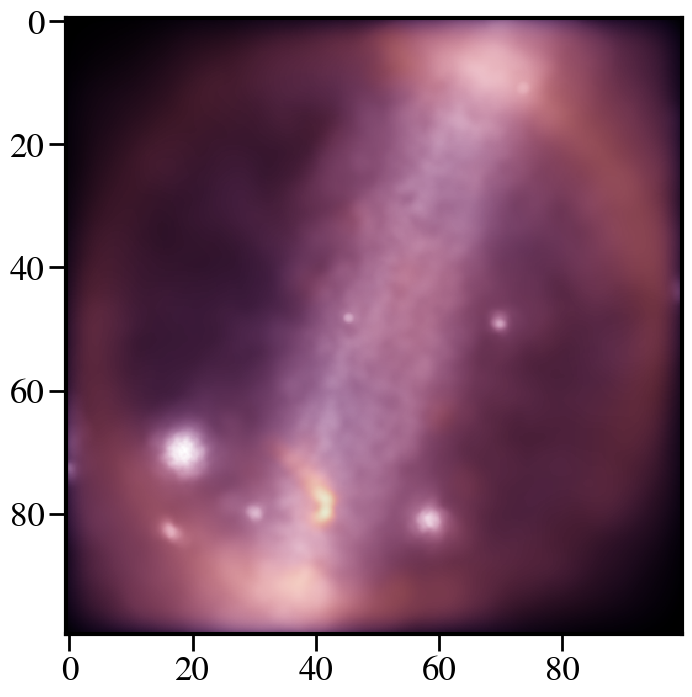

In [8]:
# # Assuming get_normalized_image is a function you've defined elsewhere
# sb = anal.Simba('PC39BP4', size=25)
# snapfile = sb.get_sim_file(149)
# catfile  = sb.get_caesar_file(149)

# ds = yt.load(snapfile)
# obj = caesar.load(catfile)
# ad = ds.all_data()

# gal = obj.galaxies[10]
# gas_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
# star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value

# hcoord = gal.minpotpos.in_units('kpc').value

# extent=50 #this is like the 'width' parameter in yt projection plots
import matplotlib.animation as animation
import matplotlib


# Set up the figure and axis
fig, ax = plt.subplots()

# Initialize the display object
image_display = ax.imshow(np.zeros((100, 100, 3)), interpolation='none')

def init():
    """Initialization function for the animation."""
    image_display.set_data(np.zeros((100, 100, 3)))  
    return [image_display]

def update(p):
    """Update function for each frame."""
    cmap_dm = matplotlib.cm.Greys_r
    cmap_gas = matplotlib.cm.magma

    qv_gas = QuickView(gas_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], p=p, t=60)
    qv_drk = QuickView(star_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], p=p, t=60)
    
    img_gas = qv_gas.get_image()
    img_drk = qv_drk.get_image()

    rgb_dm = cm.Greys_r(get_normalized_image(img_drk))
    rgb_gas = cm.magma(get_normalized_image(img_gas))

    blend = Blend.Blend(rgb_dm, rgb_gas)
    rgb_output = blend.Overlay()

    # Update the image display
    image_display.set_data(rgb_output)
    
    return [image_display]

# Create the animation
anim = animation.FuncAnimation(
    fig, 
    update, 
    init_func=init, 
    frames=360,
    interval=20,
    blit=True
)

# Save the animation as a GIF file
anim.save('output_animation_subset.gif', writer='pillow', fps=20)
print('Done animation!')


In [ ]:
# # Assuming get_normalized_image is a function you've defined elsewhere
# sb = anal.Simba('PC39BP4', size=25)
# snapfile = sb.get_sim_file(149)
# catfile  = sb.get_caesar_file(149)

# ds = yt.load(snapfile)
# obj = caesar.load(catfile)
# ad = ds.all_data()

# gal = obj.galaxies[10]
# gas_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
# star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value

# hcoord = gal.minpotpos.in_units('kpc').value

# extent=50 #this is like the 'width' parameter in yt projection plots
import matplotlib.animation as animation
import matplotlib


# Set up the figure and axis
fig, ax = plt.subplots()

# Initialize the display object
image_display = ax.imshow(np.zeros((100, 100, 3)), interpolation='none')

def init():
    """Initialization function for the animation."""
    image_display.set_data(np.zeros((100, 100, 3)))  
    return [image_display]

def update(p):
    """Update function for each frame."""
    cmap_dm = matplotlib.cm.Greys_r
    cmap_gas = matplotlib.cm.magma

    qv_gas = QuickView(gas_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], p=p, t=60)
    qv_drk = QuickView(star_pos, r='infinity', plot=False,
                        extent=[-extent, extent, -extent, extent], p=p, t=60)
    
    img_gas = qv_gas.get_image()
    img_drk = qv_drk.get_image()

    rgb_dm = cm.Greys_r(get_normalized_image(img_drk))
    rgb_gas = cm.magma(get_normalized_image(img_gas))

    blend = Blend.Blend(rgb_dm, rgb_gas)
    rgb_output = blend.Overlay()

    # Update the image display
    image_display.set_data(rgb_output)
    
    return [image_display]

# Create the animation
anim = animation.FuncAnimation(
    fig, 
    update, 
    init_func=init, 
    frames=360,
    interval=20,
    blit=True
)

# Save the animation as a GIF file
anim.save('output_animation_subset.gif', writer='pillow', fps=20)
print('Done animation!')


In [18]:
import matplotlib.pyplot as plt
import h5py
from sphviewer.tools import camera_tools

P = sph.Particles(gas_pos, gas_mass)
S = sph.Scene(P)

cm_1 = [x=hcoord[0]*0.68, y=hcoord[1]*0.68, z=hcoord[2]*0.68]

targets = [cm_1]

anchors = {}
anchors['sim_times'] = [0.0, 1.0, 'pass', 3.0, 'same','same','same']
anchors['id_frames'] =  [0,180,750,840,930,1500,1680]
anchors['r']         =  [2,'same','same','same','same','same','same']
anchors['id_targets']=  [0,1,'same','pass',0,'same',1]
anchors['t']         = [0,'same','same','same','same','same',0]
anchors['p']         = [0,'same','same','same','same','same','same']
anchors['zoom']      = [1.,'same','same','same','same','same','same']
anchors['extent']    = [10, 'same','same','same','same','same',30]

data = camera_tools.get_camera_trajectory(targets,anchors)

h = 0
for i in data:
    i['xsize'] = 250
    i['ysize'] = 250
    i['roll'] = 0
    S = sph.Scene(P)
    S.update_camera(**i)
    R = sph.Render(S)
    img = R.get_image()
    R.set_logscale()
    plt.imsave('img/image_'+str('%04d.png'%h), img, vmin=0, vmax=6, cmap='cubehelix')
    h += 1

(6, 100)


In [116]:
import numpy as np
import matplotlib.pyplot as plt
import sphviewer as sph
from sphviewer.tools import camera_tools
import yt
import caesar as ca

# Initialize your Simba analysis
sb = anal.Simba('PC39BP4', size=25)
snapfile = sb.get_sim_file(129)
catfile  = sb.get_caesar_file(129)

# Load the snapshot and caesar catalog
ds = yt.load(snapfile)
obj = caesar.load(catfile)
ad = ds.all_data()
gal = obj.galaxies[3]

# Extract gas positions and masses for the galaxy
star_pos = ad['PartType4', 'Coordinates'][gal.slist].in_units('kpc').value
star_mass = ad['PartType4', 'Masses'][gal.slist].in_units('Msun').value

h1_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
h1_mass = ds.arr(ad['PartType0', 'GrackleHI'][gal.glist], 'code_mass').in_units('Msun').value

d_pos = ad['PartType0', 'Coordinates'][gal.glist].in_units('kpc').value
d_mass = ds.arr(ad['PartType0', 'Dust_Masses'][gal.glist], 'code_mass').in_units('Msun').value

hcoord = gal.minpotpos.in_units('kpc').value

L = gal.rotation['gas_L']
x_vec = [1, 0, 0]
y_vec = [0,1,0]
cos_phi = np.dot(L, y_vec) / (np.sqrt(np.dot(y_vec, y_vec)) * np.sqrt(np.dot(L, L)))
p = np.rad2deg(np.arccos(cos_phi))


# Create Particles objects for gas and stars
P_gas = sph.Particles(h1_pos, h1_mass)
P_star = sph.Particles(star_pos, star_mass)
P_dust  = sph.Particles(d_pos, d_mass)

# Create Particles object
P = sph.Particles(gas_pos, gas_mass)

# Define the center of the particle distribution as the target
center = gal.pos.in_units('kpc').value
targets = [center]

# Number of frames in the GIF
num_frames = 100

# Define anchors for camera trajectory (rotating around z-axis)
anchors = {
    'sim_times': np.linspace(0, 1, num_frames),
    'id_frames': np.arange(num_frames),
    'r': [35] * num_frames,  # Fixed distance
    'id_targets': [0] * num_frames,  # Always target the center (index 0)
    't': np.linspace(0, 360, num_frames),  # Rotate azimuthally
    'p': np.linspace(0, 360, num_frames), #[p] * num_frames,  # Fixed polar angle (45 degrees)
    'zoom': [1.0] * num_frames,  # No zoom change
    'extent': [10] * num_frames  # Fixed extent
}

# Get camera trajectory
data = camera_tools.get_camera_trajectory(targets, anchors)

# Ensure output directory exists
if not os.path.exists('img'):
    os.makedirs('img')

# Initialize counter for image file names
h = 0

# Render images based on the camera trajectory
for i in data:
    i['xsize'] = 1000
    i['ysize'] = 1000
    i['roll'] = p  # No roll

    # Render gas particles
    S_gas = sph.Scene(P_gas)
    S_gas.update_camera(**i)
    R_gas = sph.Render(S_gas)
    img_gas = R_gas.get_image()
    R_gas.set_logscale()
    
    # Render star particles
    S_star = sph.Scene(P_star)
    S_star.update_camera(**i)
    R_star = sph.Render(S_star)
    img_star = R_star.get_image()
    R_star.set_logscale()
    
    # Render dust particles
    S_dust = sph.Scene(P_dust)
    S_dust.update_camera(**i)
    R_dust = sph.Render(S_dust)
    img_dust = R_dust.get_image()
    R_dust.set_logscale()

    rgb_star  = cm.Greys_r(get_normalized_image(img_star))
    rgb_gas = cm.magma(get_normalized_image(img_gas))
    rgb_dust = cm.inferno_r(get_normalized_image(img_dust))

    blend = Blend.Blend(rgb_star, rgb_gas)
    output = blend.Screen()
    
    plt.imsave('img/image_' + str('%04d.png' % h), output)
    h += 1

print("Images saved successfully.")


yt : [INFO     ] 2024-08-25 16:05:54,047 Calculating time from 7.114e-01 to be 2.969e+17 seconds
yt : [INFO     ] 2024-08-25 16:05:54,047 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2024-08-25 16:05:54,068 Parameters: current_time              = 2.968791388457766e+17 s
yt : [INFO     ] 2024-08-25 16:05:54,068 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-08-25 16:05:54,069 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-08-25 16:05:54,069 Parameters: domain_right_edge         = [25000. 25000. 25000.]
yt : [INFO     ] 2024-08-25 16:05:54,069 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2024-08-25 16:05:54,070 Parameters: current_redshift          = 0.4057579856290421
yt : [INFO     ] 2024-08-25 16:05:54,070 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2024-08-25 16:05:54,070 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2024-08-25 16:05:54,070 Parameters: omega_radiation     

Images saved successfully.


In [119]:
from PIL import Image
import os

# Directory where images are stored
image_dir = 'img/'

# Output GIF file
output_gif = 'output_animation.gif'

# Get a sorted list of image files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.png')])

# Load images into a list
images = [Image.open(os.path.join(image_dir, file)) for file in image_files]

# Save as GIF
images[0].save(
    output_gif,
    save_all=True,
    append_images=images[1:],  # Append the rest of the images
    duration=100,  # Duration between frames in milliseconds
    loop=0  # Loop forever; use 1 to loop once
)

print(f"GIF saved as {output_gif}")


GIF saved as output_animation.gif
